In [140]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [141]:
testperson = 8

In [142]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Tobias_8.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.275872,1,1,-77.699707,34.729389,644.341980,-11.757599,39.546936,649.238831,0.674272,...,3.730362,3.564331,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
1,0.285557,1,1,-77.669357,34.764503,644.362488,-11.722041,39.570274,649.261230,0.674198,...,3.733170,3.560776,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
2,0.295832,1,1,-77.579346,34.860832,644.313599,-11.655806,39.621834,649.212097,0.674008,...,3.737595,3.564102,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
3,0.308472,1,1,-77.552605,34.890236,644.313599,-11.628642,39.648834,649.208252,0.673948,...,3.735458,3.570694,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
4,0.318912,1,1,-77.535500,34.917969,644.323059,-11.597230,39.666298,649.216187,0.673907,...,3.728882,3.579208,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
5,0.329131,1,1,-77.487061,34.961590,644.309692,-11.562971,39.691357,649.198730,0.673802,...,3.728043,3.583771,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
6,0.340823,1,1,-77.477226,34.966541,644.286133,-11.551970,39.689728,649.169922,0.673786,...,3.728134,3.582108,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
7,0.351805,1,1,-77.458321,34.962597,644.249329,-11.544415,39.681526,649.120605,0.673754,...,3.736038,3.578720,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
8,0.361777,1,1,-77.374023,34.952564,644.239746,-11.485340,39.644360,649.104553,0.673570,...,3.744064,3.588394,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive
9,0.374641,1,1,-77.337196,34.937569,644.225281,-11.455062,39.618511,649.082397,0.673493,...,3.746277,3.587891,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive


In [143]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(238296, 39)

In [144]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P07_text.txt', 'AI_HC_P07_MCQ.txt', 'AI_HC_P07_FIBQ.txt',
       'OR_HC_P07_text.txt', 'OR_HC_P07_MCQ.txt', 'OR_HC_P07_FIBQ.txt',
       'AI_SK_P07_text.txt', 'AI_SK_P07_MCQ.txt', 'AI_SK_P07_FIBQ.txt',
       'OR_SK_P07_text.txt', 'OR_SK_P07_MCQ.txt', 'OR_SK_P07_FIBQ.txt',
       'AI_KB_P07_text.txt', 'AI_KB_P07_MCQ.txt', 'AI_KB_P07_FIBQ.txt',
       'OR_KB_P07_text.txt', 'OR_KB_P07_MCQ.txt', 'OR_KB_P07_FIBQ.txt'],
      dtype=object)

In [145]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-91.647713,11.777465,684.829895,-25.849596,20.580915,690.717651,0.694006,...,3.702454,3.652283,True,OR_SK_P07_text.txt,7.0,16.0,Times New Roman,SK,False,Immersive
1,0.011248,1,1,-91.636482,11.799757,684.878906,-25.817766,20.596560,690.771606,0.693968,...,3.698639,3.654648,True,OR_SK_P07_text.txt,7.0,16.0,Times New Roman,SK,False,Immersive
2,0.021987,1,1,-91.586220,11.868755,685.002319,-25.769087,20.630924,690.881348,0.693827,...,3.701508,3.661621,True,OR_SK_P07_text.txt,7.0,16.0,Times New Roman,SK,False,Immersive
3,0.033350,1,1,-91.584625,11.890025,685.072083,-25.764231,20.647055,690.957703,0.693803,...,3.708008,3.669571,True,OR_SK_P07_text.txt,7.0,16.0,Times New Roman,SK,False,Immersive
4,0.044533,1,1,-91.578705,11.903349,685.145508,-25.756916,20.661057,691.040222,0.693770,...,3.711670,3.669418,True,OR_SK_P07_text.txt,7.0,16.0,Times New Roman,SK,False,Immersive


In [146]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,735.590820,663.823242,529.550028,542.979441
1,0.011248,728.111649,664.871750,532.247086,540.286417
2,0.021987,726.813278,656.128387,532.823310,542.912579
3,0.033350,732.736511,656.639404,535.997972,545.748038
4,0.044533,734.654465,651.832809,532.380896,547.964873
...,...,...,...,...,...
12283,142.526976,1929.111938,1867.800293,349.649291,343.456285
12284,142.538660,1927.017975,1868.516693,349.701197,342.785239
12285,142.549833,1951.685028,1891.302338,359.355690,343.508298
12286,142.560278,2010.046387,1949.956360,355.262275,356.719787


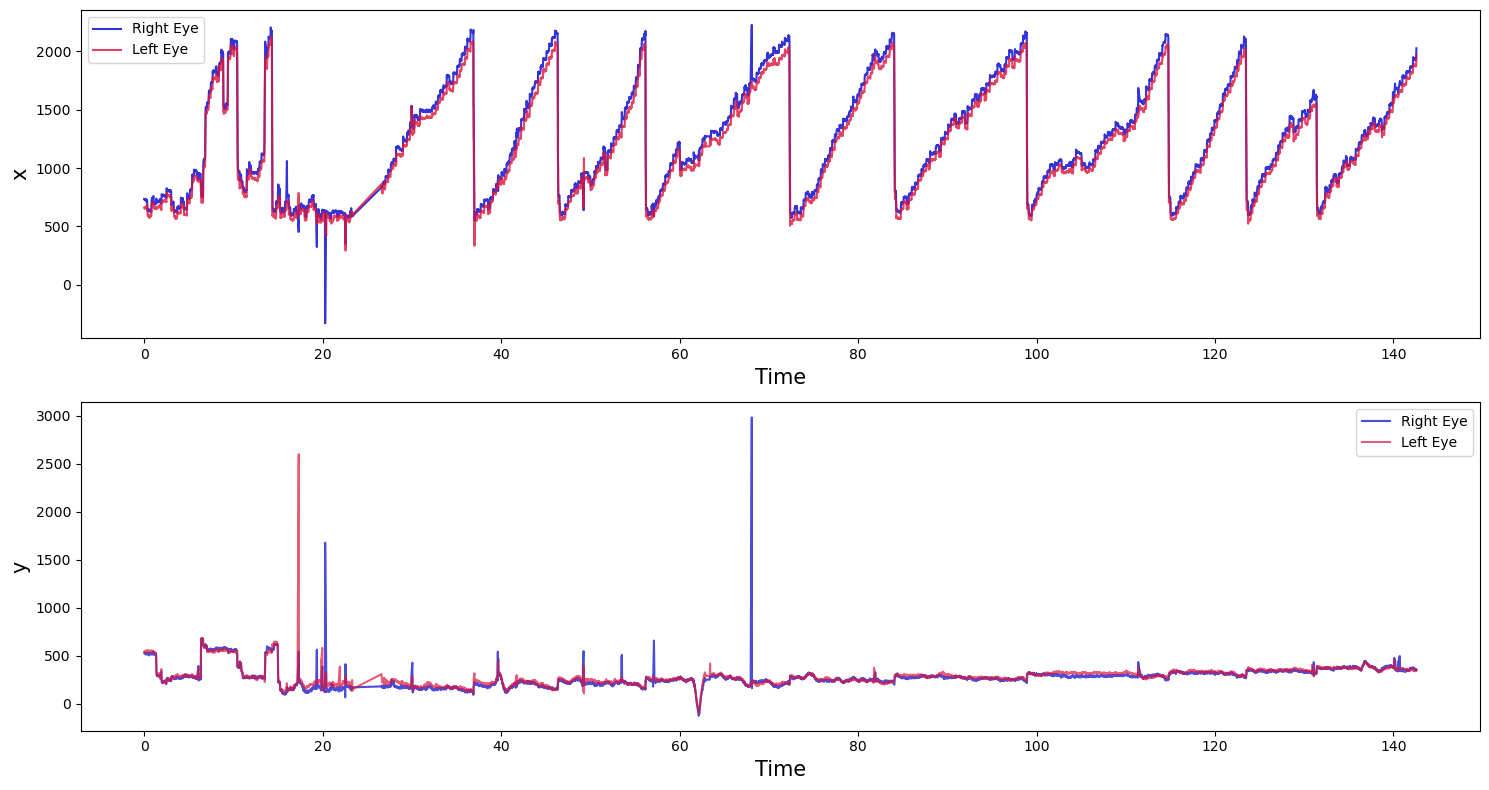

In [147]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [148]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [149]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [150]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [151]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,630.158577,591.907578,153.160583,162.594212
1,0.010750,628.473930,591.790886,159.139076,162.133838
2,0.022094,626.084251,590.960350,158.297399,163.455759
3,0.033162,625.816078,588.151398,157.646341,163.275204
4,0.044023,625.101624,590.975990,151.409476,161.029733
...,...,...,...,...,...
417,4.773921,619.249191,570.472870,167.923579,152.999532
418,4.785496,615.443535,587.815247,170.217673,160.894775
419,4.796509,618.594818,586.156387,178.645871,159.536011
420,4.807034,629.294319,582.502556,170.972768,166.256361


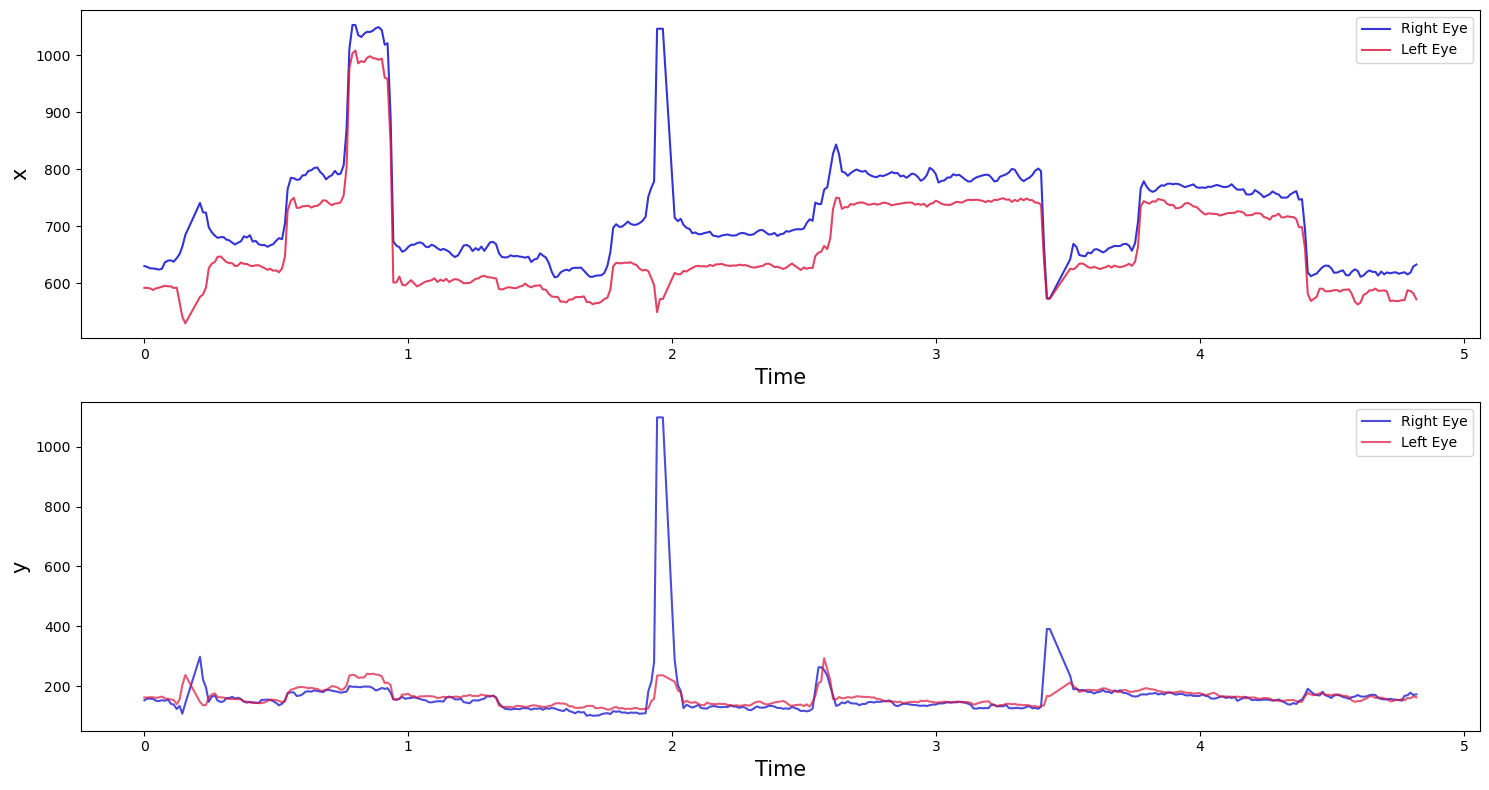

In [152]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


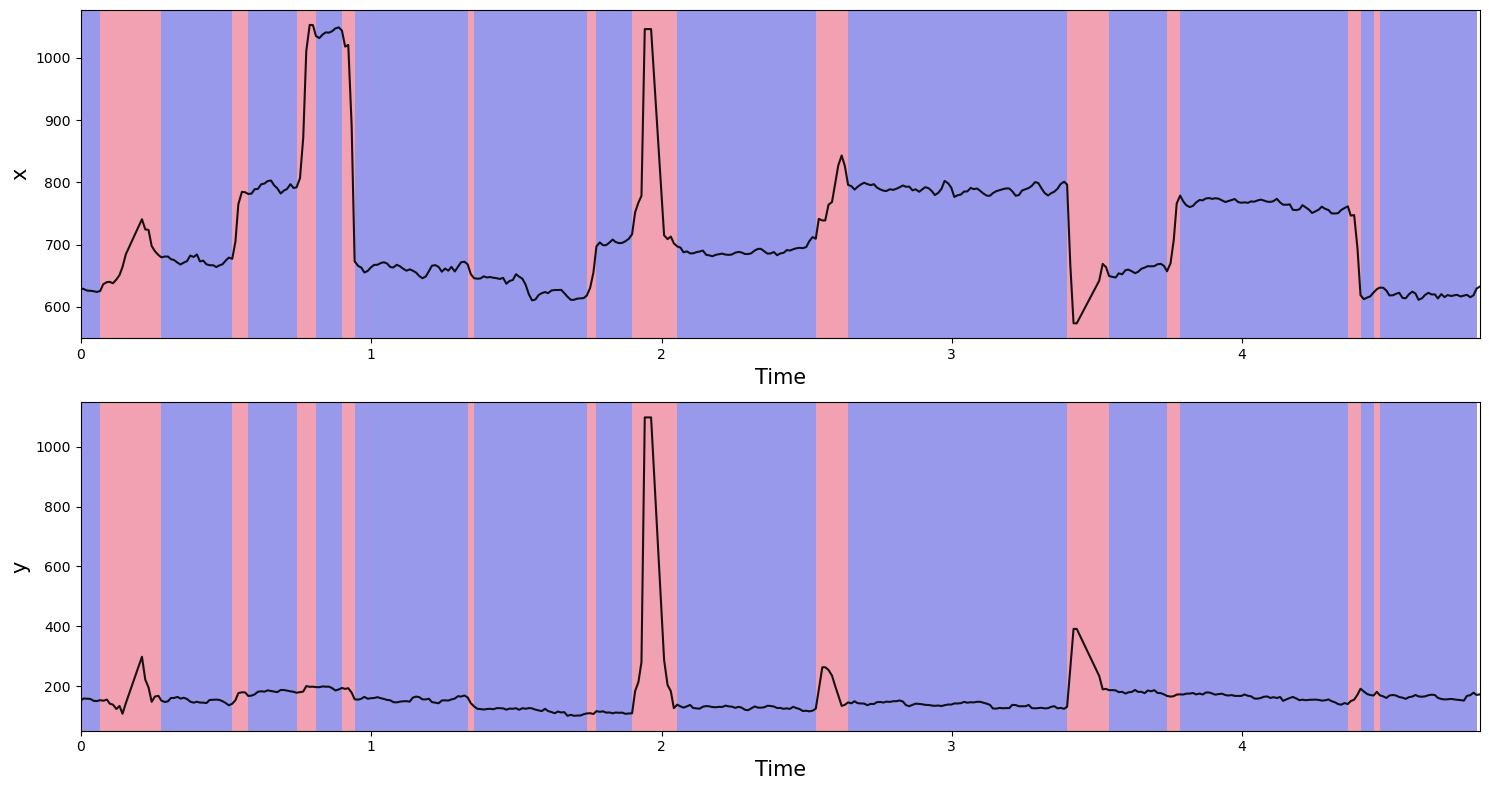

In [153]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [154]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to 

In [155]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-80.609787,29.450806,665.753357,-14.390908,36.008999,670.830750,0.675199,...,3.264572,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,0
1,0.011794,1,1,-80.623238,29.483948,666.147827,-14.371385,36.061085,671.303711,0.675125,...,3.271332,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1
2,0.021208,1,1,-80.661003,29.487724,666.687744,-14.365763,36.077496,671.780518,0.675067,...,3.274628,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1
3,0.033580,1,1,-80.665871,29.455360,666.662537,-14.377803,36.040985,671.747253,0.675085,...,3.277237,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1
4,0.045006,1,1,-80.655396,29.410624,666.470459,-14.391191,35.963989,671.518799,0.675113,...,3.276901,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,8.405428,1,1,-88.153137,28.589500,666.949951,-22.392363,37.518112,672.868652,0.691048,...,3.626358,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1
749,8.415740,1,1,-88.094444,28.628548,666.885681,-22.340073,37.536198,672.810669,0.690939,...,3.630630,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1
750,8.427386,1,1,-88.064301,28.641245,666.835815,-22.303215,37.546272,672.747375,0.690888,...,3.637268,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1
751,8.438665,1,1,-88.022926,28.644123,666.740295,-22.261425,37.536053,672.628662,0.690826,...,3.637054,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Skimming,1


In [156]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [157]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-77.699707,34.729389,644.341980,-11.757599,39.546936,649.238831,0.674272,...,3.564331,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
1,0.009685,1,1,-77.669357,34.764503,644.362488,-11.722041,39.570274,649.261230,0.674198,...,3.560776,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
2,0.019960,1,1,-77.579346,34.860832,644.313599,-11.655806,39.621834,649.212097,0.674008,...,3.564102,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
3,0.032600,1,1,-77.552605,34.890236,644.313599,-11.628642,39.648834,649.208252,0.673948,...,3.570694,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
4,0.043040,1,1,-77.535500,34.917969,644.323059,-11.597230,39.666298,649.216187,0.673907,...,3.579208,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9029,103.113667,1,1,-80.689110,30.465111,667.948669,-14.487348,36.688641,673.011047,0.674769,...,3.411911,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
9030,103.125335,1,1,-80.701103,30.441603,667.965942,-14.486789,36.669552,673.031128,0.674791,...,3.403824,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
9031,103.136530,1,1,-80.706551,30.415905,667.974670,-14.484933,36.652542,673.042725,0.674801,...,3.399323,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1
9032,103.146826,1,1,-80.721092,30.380766,668.016113,-14.472360,36.628788,673.079834,0.674823,...,3.397736,True,AI_HC_P07_text.txt,7.0,16.0,Times New Roman,HC,False,Immersive,1


In [158]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [159]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [160]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")